## 1. Upload the Data
## 2. Cleaning missing data
## 3. Standarizing crop/country names
## 4. Handing outliers
## 5. Plotting trends

!dir

In [ ]:
!ls

In [ ]:
import pandas as pd

In [ ]:
df_all = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', low_memory=False)

In [ ]:
df_all.shape

In [ ]:
df_all.columns

In [ ]:
df_all.head(10)

In [ ]:
print(df_all['Unit'].unique())

In [ ]:
len(df_all['Area'].unique())

In [ ]:
print(df_all['Area'].unique())

In [ ]:
print(df_all['Element'].unique())

In [ ]:
## check missing data; Quick summary of nulls per column
df_all.isnull().sum()

In [ ]:
# Percentage of missing values per column
print((df_all.isnull().mean()*100).round(2))

In [ ]:
df_all = df_all.dropna(subset=['Area Code', 'Area Code (M49)', 'Area'])

In [ ]:
df_all.columns

In [ ]:
df_all['Unit'] = df_all['Unit'].fillna('unknown')

In [ ]:
##3.Standarizing crop/country names
df_all['Area'].unique()

In [ ]:
country_list ={
    'Syrian Arab Republic' : 'Syria',
    'Venezuela (Bolivarian Republic Of)': 'Venezuela',
    'United Republic Of Tanzania': 'Tanzania',
    'Netherlands (Kingdom Of The)' : 'Netherlands'
     }

In [ ]:
df_all['Area'] = df_all['Area'].replace(country_list)

In [ ]:
print(df_all['Area'])

In [ ]:
df_all['Item'].unique()

In [ ]:
#  Handle outliers:
from scipy import stats

In [ ]:
print(df_all.columns.tolist())

In [ ]:
df_head=df_all.head(10)

In [ ]:
df_head = pd.melt(
                  df_all, 
                  id_vars=['Area','Item', 'Element', 'Unit'],
                  var_name='Year',
                  value_name='Value')

In [ ]:
df_head

In [ ]:
ls

In [1]:
import pandas as pd

In [2]:
df_all=pd.read_csv("Production_Crops_Livestock_E_All_Data.csv", low_memory=False)

In [3]:
df_all.head(2)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N,Y2023,Y2023F,Y2023N
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,NaN,36862.0,A,NaN,36462.0,A,NaN,37000.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,NaN,1743.2,A,NaN,1742.0,A,NaN,1810.8,A,NaN


In [14]:
year_columns = [col for col in df_all.columns if col.startswith("Y")]
df_melted1= pd.melt(
                   df_all,
                   id_vars =['Area', 'Item'],
                   )

In [17]:
df_melted1.head(5)

,Area,Item,variable,value
0,Afghanistan,"Almonds, in shell",Area Code,2
1,Afghanistan,"Almonds, in shell",Area Code,2
2,Afghanistan,"Almonds, in shell",Area Code,2
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Area Code,2
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Area Code,2


In [24]:
year_columns = [col for col in df_all.columns if col.startswith("Y")]
df_melted= pd.melt(
                   df_all,
                   id_vars =['Area', 'Item'],
                   value_vars = year_columns,
                   var_name = 'Year',
                   value_name = 'Value')
df_melted['Year'] = df_melted['Year'].str.extract(r'Y(\d{4})')[0].astype(int)
df_melted = df_melted.dropna(subset=['Value'])
df_melted = df_melted[df_melted['Value'] != 0]

In [25]:
df_melted.head(5)

,Area,Item,Year,Value
6,Afghanistan,Apples,1961,2220.0
7,Afghanistan,Apples,1961,6801.8
8,Afghanistan,Apples,1961,15100.0
9,Afghanistan,Apricots,1961,4820.0
10,Afghanistan,Apricots,1961,6639.0


In [29]:
data_wheat = df_melted[df_melted['Item'] == 'Wheat']

In [36]:
data_wheat.head(5)

,Area,Item,Year,Value
189,Afghanistan,Wheat,1961,2230000.0
190,Afghanistan,Wheat,1961,1022.0
191,Afghanistan,Wheat,1961,2279000.0
524,Albania,Wheat,1961,126500.0
525,Albania,Wheat,1961,773.1


In [39]:
data_wheat['Value'] = pd.to_numeric(data_wheat['Value'], errors = 'coerce') 
data_wheat = data_wheat.dropna(subset = 'Value')

In [40]:
data_wheat.head(5)

,Area,Item,Year,Value
189,Afghanistan,Wheat,1961,2230000.0
190,Afghanistan,Wheat,1961,1022.0
191,Afghanistan,Wheat,1961,2279000.0
524,Albania,Wheat,1961,126500.0
525,Albania,Wheat,1961,773.1


In [44]:
trend_wheat = data_wheat.groupby('Year')['Value'].sum().reset_index()

In [45]:
trend_wheat

,Year,Value
0,1961,1.857128e+09
1,1962,1.996708e+09
2,1963,1.916451e+09
3,1964,2.111769e+09
4,1965,2.103867e+09
...,...,...
58,2019,4.415106e+09
59,2020,4.410664e+09
60,2021,4.495068e+09
61,2022,4.630301e+09


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

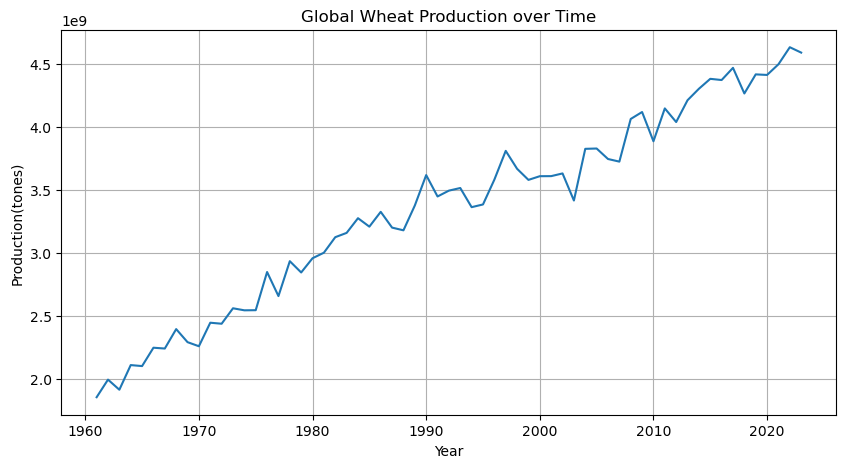

In [59]:
#plt.figure(figsize=(10, 5))
plt.figure(figsize=(10, 5))
sns.lineplot(data= trend_wheat, x = 'Year', y= 'Value')
plt.title('Global Wheat Production over Time')
plt.xlabel('Year')
plt.ylabel('Production(tones)')
plt.grid(True)
plt.show()

In [60]:
ls

FAO1.ipynb
Production_Crops_Livestock_E_All_Data.csv
Production_Crops_Livestock_E_All_Data_NOFLAG.csv
Production_Crops_Livestock_E_AreaCodes.csv
Production_Crops_Livestock_E_Elements.csv
Production_Crops_Livestock_E_Flags.csv
Production_Crops_Livestock_E_ItemCodes.csv
Untitled.ipynb


In [61]:
df_all.head(5)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N,Y2023,Y2023F,Y2023N
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,NaN,36862.0,A,NaN,36462.0,A,NaN,37000.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,NaN,1743.2,A,NaN,1742.0,A,NaN,1810.8,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,t,0.0,...,NaN,64256.0,A,NaN,63515.0,A,NaN,67000.0,A,NaN
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,NaN,...,NaN,25357.0,E,NaN,25403.0,E,NaN,25439.0,E,NaN
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5412,Yield,kg/ha,NaN,...,NaN,705.0,E,NaN,704.0,E,NaN,704.0,E,NaN


In [66]:
# reshape the data (wide –––––––––> long format):
df_all['Element'].unique

<bound method Series.unique of 0        Area harvested
1                 Yield
2            Production
3        Area harvested
4                 Yield
              ...      
78167             Yield
78168        Production
78169    Area harvested
78170             Yield
78171        Production
Name: Element, Length: 78172, dtype: object>

In [97]:
data_wheat = df_all[
    (df_all['Item'] == 'Wheat')&
    (df_all['Element'] == 'Production')
]
# melt the year columns into one:
year_columns = [col for col in data_wheat.columns if col.startswith("Y")]
wheat_long= pd.melt(
                    data_wheat,
                    id_vars= ['Area', 'Item', 'Element', 'Unit'],
                    value_vars = year_columns,
                    var_name = 'Year',
                    value_name = 'Value')
wheat_long["Year"] = wheat_long["Year"].str.extract(r"(\d{4})").astype(int)
wheat_long = wheat_long.dropna(subset = 'Value')

In [104]:
print(wheat_long['Value'].dtype)

object


In [107]:
wheat_long['Value'] = pd.to_numeric(wheat_long['Value'], errors = 'coerce')

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

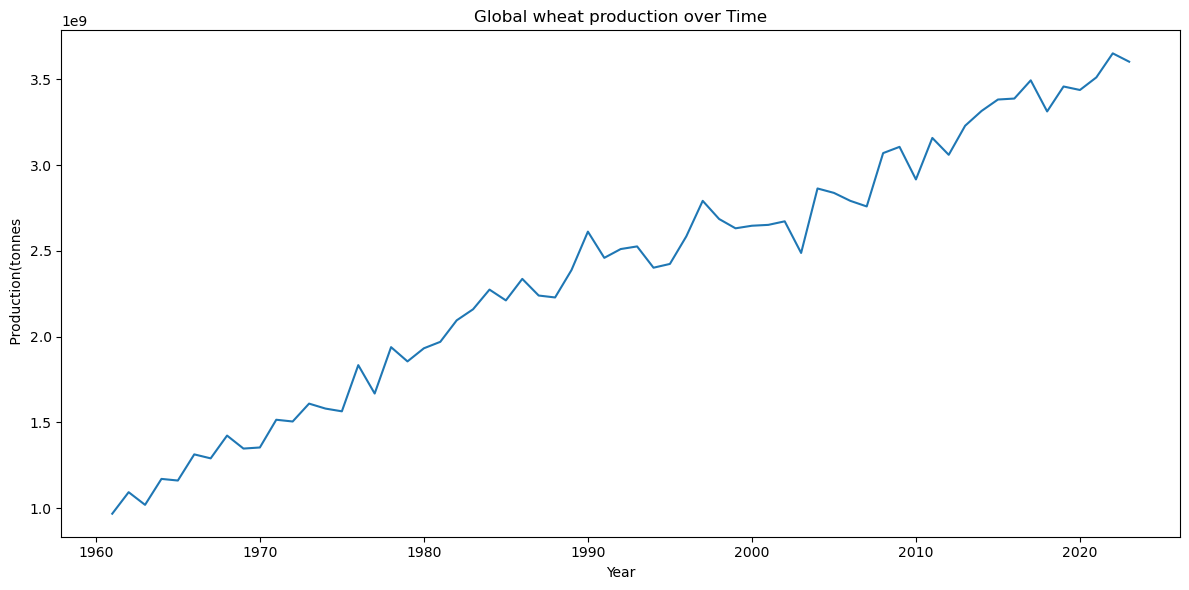

In [119]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = wheat_long.groupby('Year')['Value'].sum().reset_index(), x = 'Year', 
             y= 'Value')
plt.title('Global wheat production over Time')
plt.ylabel(' Production(tonnes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

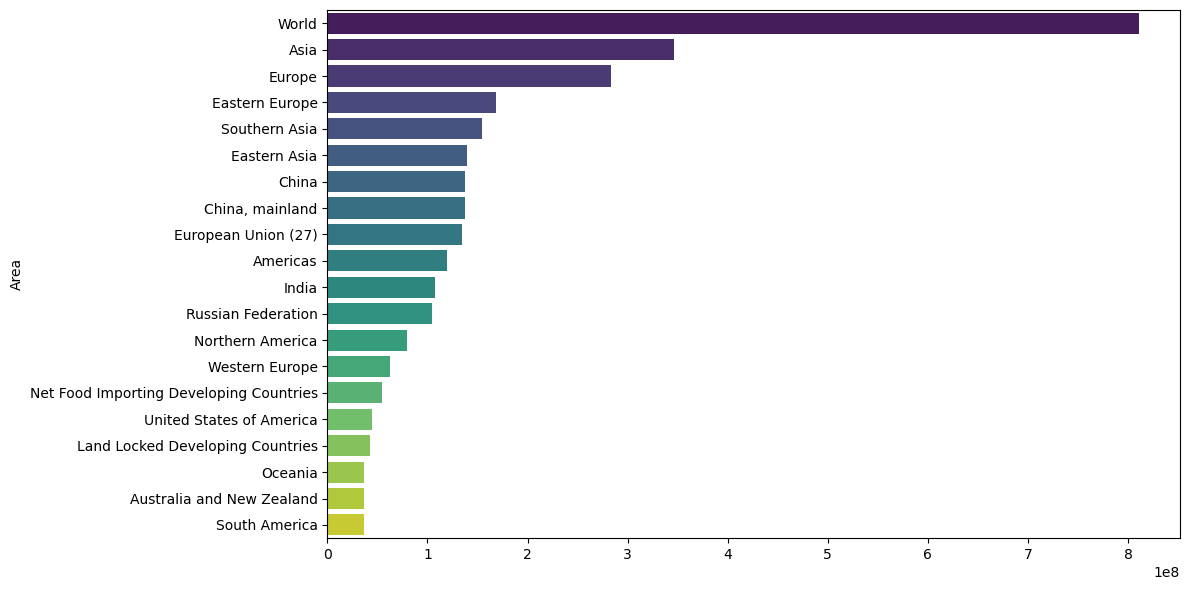

In [140]:
# identify top 10 wheat producers in 2022
wheat_2022 = wheat_long[wheat_long['Year'] == 2022]
top_countries = wheat_2022.groupby('Area')['Value'].sum().sort_values(ascending = False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x= top_countries.values, y= top_countries.index, palette='viridis')
plt.tight_layout()

In [134]:
top_countries

Area
World                                      8.113844e+08
Asia                                       3.461306e+08
Europe                                     2.832530e+08
Eastern Europe                             1.686369e+08
Southern Asia                              1.541848e+08
Eastern Asia                               1.392265e+08
China                                      1.377260e+08
China, mainland                            1.377200e+08
European Union (27)                        1.343042e+08
Americas                                   1.192453e+08
India                                      1.077421e+08
Russian Federation                         1.042339e+08
Northern America                           7.923262e+07
Western Europe                             6.251950e+07
Net Food Importing Developing Countries    5.466701e+07
United States of America                   4.489783e+07
Land Locked Developing Countries           4.226233e+07
Oceania                                    

In [126]:
wheat_2022 

,Area,Item,Element,Unit,Year,Value
30195,Afghanistan,Wheat,Production,t,2022,3802895.0
30196,Albania,Wheat,Production,t,2022,233145.0
30197,Algeria,Wheat,Production,t,2022,3000000.0
30198,Angola,Wheat,Production,t,2022,8097.0
30199,Argentina,Wheat,Production,t,2022,22150287.0
...,...,...,...,...,...,...
30635,Sudan,Wheat,Production,t,2022,NaN
30640,Tajikistan,Wheat,Production,t,2022,NaN
30645,Uganda,Wheat,Production,t,2022,NaN
30655,Yemen,Wheat,Production,t,2022,NaN


In [98]:
wheat_long

,Area,Item,Element,Unit,Year,Value
0,Afghanistan,Wheat,Production,t,1961,2279000.0
1,Albania,Wheat,Production,t,1961,97800.0
2,Algeria,Wheat,Production,t,1961,685723.0
3,Angola,Wheat,Production,t,1961,20000.0
4,Argentina,Wheat,Production,t,1961,5725000.0
...,...,...,...,...,...,...
31135,Tajikistan,Wheat,Production,t,2023,Unofficial figure
31137,Tunisia,Wheat,Production,t,2023,Unofficial figure
31140,Uganda,Wheat,Production,t,2023,Unofficial figure
31150,Yemen,Wheat,Production,t,2023,Unofficial figure
